In [10]:

from datetime import datetime, date, timedelta
import matplotlib
import pandas as pd
from pandas import Series, DataFrame
from datetime import datetime
from matplotlib import pyplot as plt

In [11]:
incidents = pd.read_csv('Police_Incident_Reports.csv')
incidents.head()


,IncidentID,IncidentType,CaseNumber,IncidentDate,Suspect,Arrested,Address,Victim,Details,ReleasedBy,DateModified
0,7400,Assist Outside Agency,2005-13680 ...,2005-10-07T03:33:00.000Z,NaN,...,700 Block of E. Washington Ave. ...,...,On 2/6/05 at approximately 10:33 p.m. Officer ...,Mike Hanson,NaN
1,7401,Arrested Person,2005-22647 ...,2005-03-03T05:42:00.000Z,NaN,"Tony R Markovitch, 20 years old, 301 Knutson D...",First St & E Washington Ave ...,n/a ...,"At approximately 11:42 pm, an officer noted a ...",Lt Pat Malloy,NaN
2,7402,Arrested Person,2005-22345 ...,2005-03-02T14:30:00.000Z,NaN,Martell D. Britton m/b 05-03-85\r\r\nCharge: ...,8 New Berm Court ...,Home Depot ...,"On 03/02/2005 at approximately 8:15 am, the Ma...",Lt. T. Peterson,NaN
3,7403,Arrested Person,2005-22688 ...,2005-03-03T13:30:00.000Z,NaN,"Twainesse L Peavy, 26 yrs old, 2317 Fish Hatch...",4300 Lumley Rd ...,Adult male resident of Madison ...,"At approximately 7:30 am this date, Officers r...",Lt. Pat Malloy,NaN
4,7404,Information,2005-999999 ...,2005-03-04T19:45:00.000Z,NaN,...,211 S. Carroll Street ...,...,DELIVERY NOTICES FOR UNPAID PARKING TICKETS\r\...,Lieutenant Joe Balles,NaN


In [12]:
dates = pd.to_datetime(incidents['IncidentDate']) #converting all to a pd timestamp type
print(type(dates[0]).__doc__)


    Pandas replacement for python datetime.datetime object.

    Timestamp is the pandas equivalent of python's Datetime
    and is interchangeable with it in most cases. It's the type used
    for the entries that make up a DatetimeIndex, and other timeseries
    oriented data structures in pandas.

    Parameters
    ----------
    ts_input : datetime-like, str, int, float
        Value to be converted to Timestamp.
    freq : str, DateOffset
        Offset which Timestamp will have.
    tz : str, pytz.timezone, dateutil.tz.tzfile or None
        Time zone for time which Timestamp will have.
    unit : str
        Unit used for conversion if ts_input is of type int or float. The
        valid values are 'D', 'h', 'm', 's', 'ms', 'us', and 'ns'. For
        example, 's' means seconds and 'ms' means milliseconds.
    year, month, day : int
    hour, minute, second, microsecond : int, optional, default 0
    nanosecond : int, optional, default 0
        .. versionadded:: 0.23.0
    tzi

In [13]:
print(incidents.columns)
len(incidents[incidents['Arrested'] != incidents['Arrested'][0]])



Index(['IncidentID', 'IncidentType', 'CaseNumber', 'IncidentDate', 'Suspect',
       'Arrested', 'Address', 'Victim', 'Details', 'ReleasedBy',
       'DateModified'],
      dtype='object')


12870

Text(0.5, 1.0, 'Number of Incidents at each hour of day in Madison, WI')

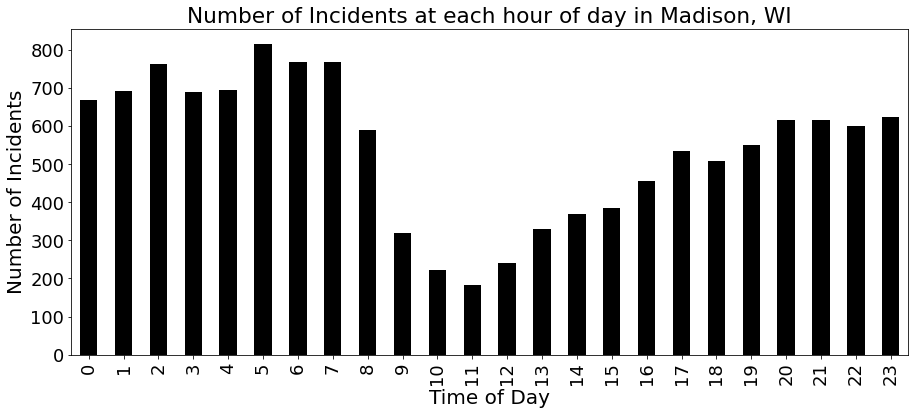

In [14]:
#IDEA 1
#could make a plot that shows at what time a crime is most likely to occur using this data
#probably by interval of 30 mins or 1 hr

dates = pd.to_datetime(incidents['IncidentDate']) #converting all to a pd timestamp type
dates -= dates.dt.floor('d') #deducting each time stamp by a day to get the hour/min
hours = sorted([int(timeval.seconds/3600) for timeval in dates])#extracting hours (rounded down)

hour_count = {}
for time in hours:
    if time not in hour_count:
        hour_count[time] = 0
    hour_count[time] += 1
fig, ax = plt.subplots(1, figsize=(15,6))
df = pd.DataFrame({'Hours':list(hour_count.keys()),'Count':list(hour_count.values()) })
df.plot.bar(ax=ax, x='Hours', y='Count', legend=False, figsize=(15,6), color='black')
ax.set_ylabel('Number of Incidents', size=20)
ax.set_xlabel('Time of Day', size=20)
ax.set_title('Number of Incidents at each hour of day in Madison, WI')

Text(0.5, 1.0, '% of Incidents at each hour of day in Madison, WI')

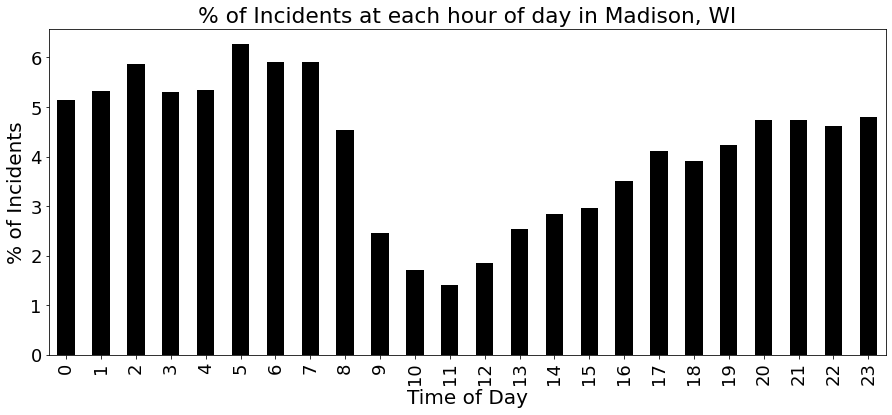

In [15]:
total_count = df['Count'].sum()
df['Count'] = df['Count'] / total_count * 100
ax = df.plot.bar(x='Hours', y='Count', legend=False, figsize=(15,6), color='black')
ax.set_ylabel('% of Incidents', size= 20)
ax.set_xlabel('Time of Day', size=20)
matplotlib.rcParams["font.size"] = 18
ax.set_title('% of Incidents at each hour of day in Madison, WI')

In [16]:
#some analysis

# It appears that crimes occur the least around 8:00AM to 4:00PM, likely because of high human outdoor activity.
# Crimes such as theft and drunk-driving are often done when its dark / after late-night parties